<a href="https://colab.research.google.com/github/MeghanaKankanala/Projects/blob/master/HR_CHURN__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
hr_churn=pd.read_csv("HR_Data.csv")
print(hr_churn.shape)
hr_churn.head()

(8998, 18)


,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [ ]:
hr_churn.isnull().sum()

SLNO                           0
Candidate.Ref                  0
DOJ.Extended                   0
Duration.to.accept.offer       0
Notice.period                  0
Offered.band                   0
Pecent.hike.expected.in.CTC    0
Percent.hike.offered.in.CTC    0
Percent.difference.CTC         0
Joining.Bonus                  0
Candidate.relocate.actual      0
Gender                         0
Candidate.Source               0
Rex.in.Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [ ]:
hr_churn=hr_churn.drop("SLNO", axis=1)
hr_churn=hr_churn.drop("Candidate.Ref", axis=1)

hr_churn

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined
8994,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,Joined
8995,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined
8996,No,5,0,E2,20.00,10.00,-8.33,No,No,Male,Direct,8,ETS,Noida,34,Joined


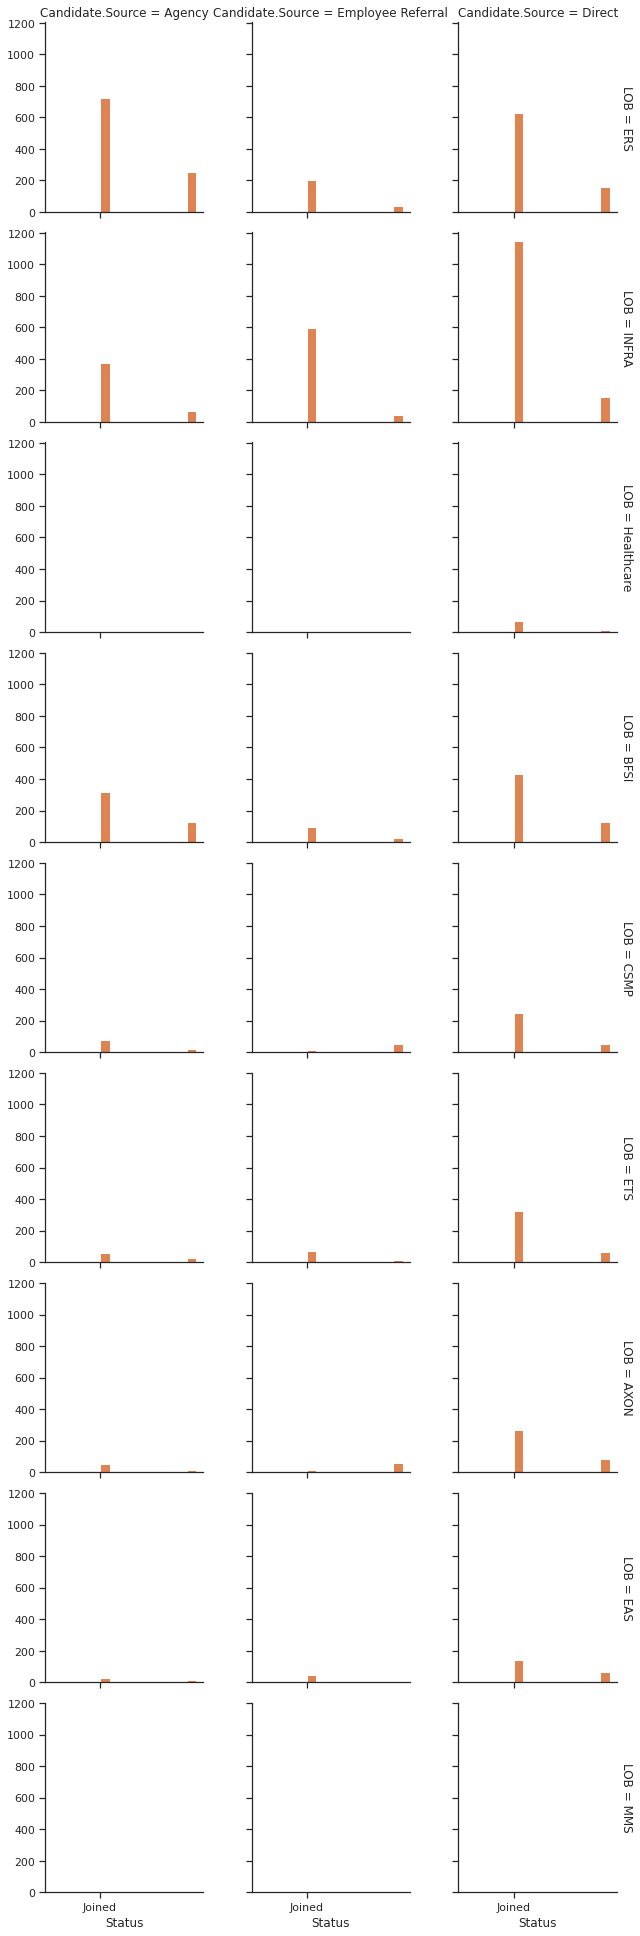

In [ ]:
g=sns.FacetGrid(hr_churn,col="Candidate.Source",row='LOB',margin_titles=True,hue="Gender")
g=g.map(plt.hist,"Status")
plt.show(g)

<Figure size 1440x1440 with 0 Axes>

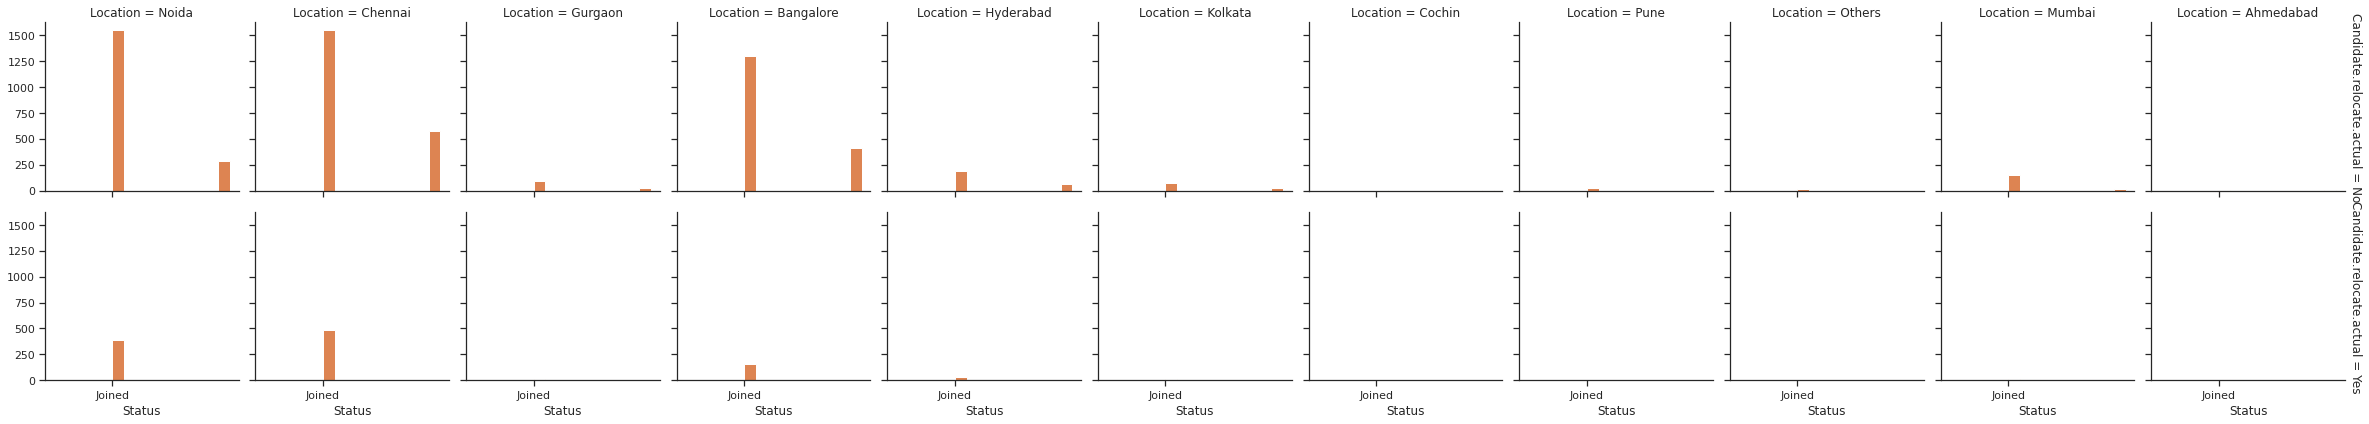

In [ ]:
plt.figure(figsize=(20,20))
g=sns.FacetGrid(hr_churn,col='Location',row="Candidate.relocate.actual",margin_titles=True,hue="Gender")
g=g.map(plt.hist,"Status")
plt.show()

#encoding dependent categorical variable into numeric


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
hr_churn["Status"]=encoder.fit_transform(hr_churn["Status"])
hr_churn["Status"].value_counts()

0    7316
1    1682
Name: Status, dtype: int64

#checking correlation b/w numerical variables


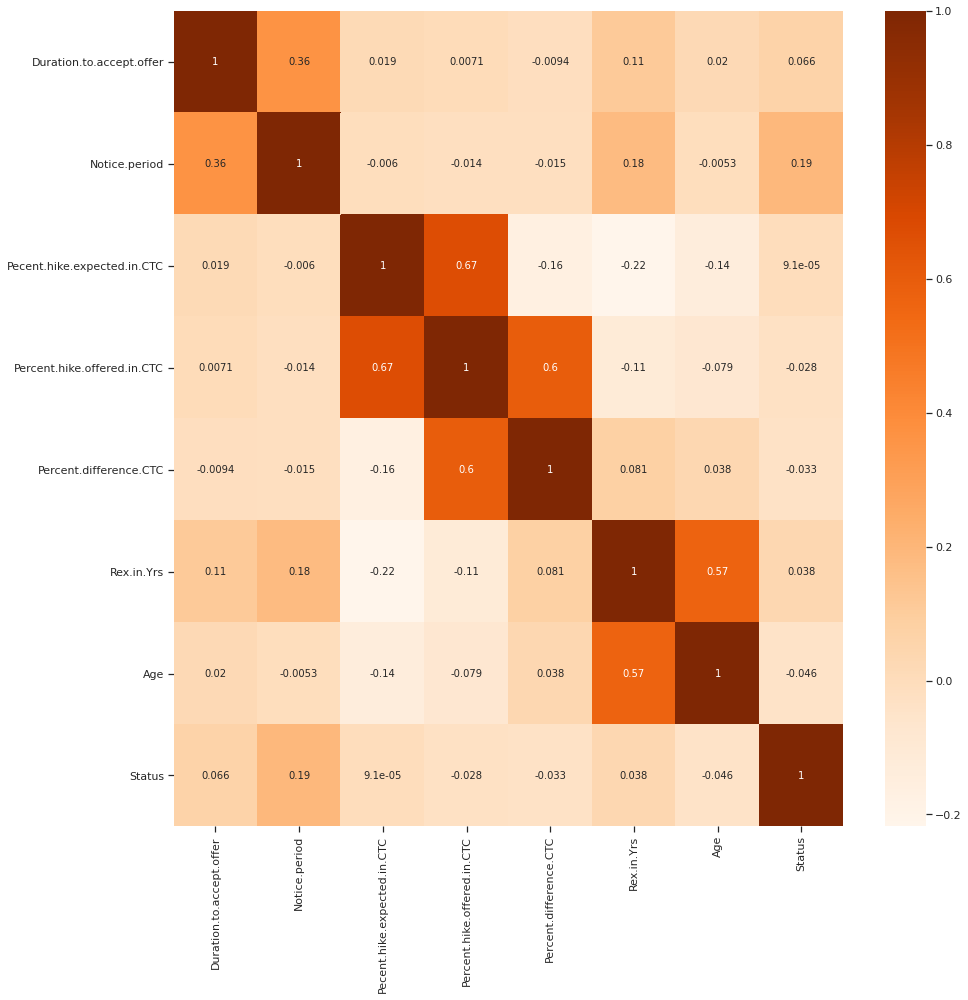

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(hr_churn.corr(),annot=True,cmap="Oranges")
plt.show()

In [ ]:
num_df= hr_churn._get_numeric_data()
num_col=num_df.columns
num_col

Index(['Duration.to.accept.offer', 'Notice.period',
       'Pecent.hike.expected.in.CTC', 'Percent.hike.offered.in.CTC',
       'Percent.difference.CTC', 'Rex.in.Yrs', 'Age', 'Status'],
      dtype='object')

In [ ]:
cat_col=[]
for i in hr_churn.columns:
  if i not in num_col:
    cat_col.append(i)
print(cat_col)




['DOJ.Extended', 'Offered.band', 'Joining.Bonus', 'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'LOB', 'Location']


# **Performing chi2 test inorder to know the relation b/w independent and dependent categorical variables**

In [ ]:
from scipy.stats import chi2_contingency
target_related_cols=[]
for i in cat_col:
   if i in hr_churn.columns:
      cross_table=pd.crosstab( hr_churn.loc[:,i],hr_churn["Status"])
      obs=cross_table.values
      chi2, p, dof, ex = chi2_contingency(obs, correction=False)
      if p < 0.05:
        print("Null statement:" ,i ," is rejected "," which means it has some association with the target variable")
        target_related_cols.append(i)
print(target_related_cols)

Null statement: Offered.band  is rejected   which means it has some association with the target variable
Null statement: Candidate.relocate.actual  is rejected   which means it has some association with the target variable
Null statement: Candidate.Source  is rejected   which means it has some association with the target variable
Null statement: LOB  is rejected   which means it has some association with the target variable
Null statement: Location  is rejected   which means it has some association with the target variable
['Offered.band', 'Candidate.relocate.actual', 'Candidate.Source', 'LOB', 'Location']


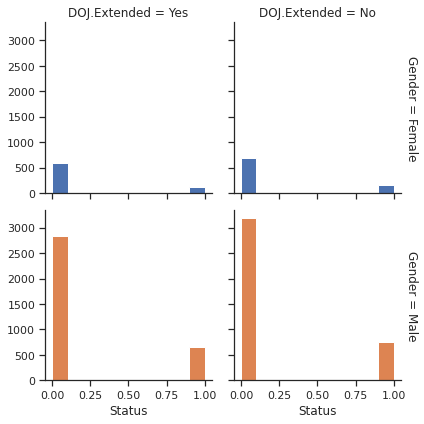

In [ ]:
g=sns.FacetGrid(hr_churn,col="DOJ.Extended",row='Gender',hue="Gender",margin_titles=True)
g=g.map(plt.hist,"Status")

Many of the male and female would backout of the job when DOJ extension is not given

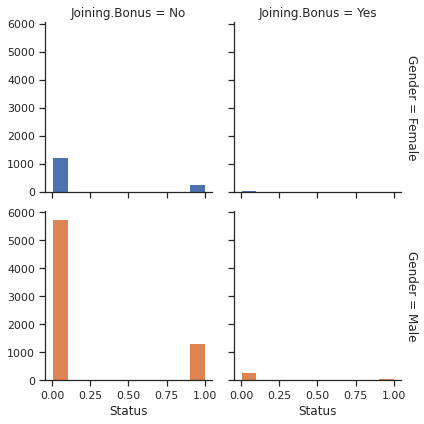

In [ ]:
g=sns.FacetGrid(hr_churn,col='Joining.Bonus',row='Gender',hue="Gender",margin_titles=True)
g=g.map(plt.hist,"Status")

People would back out when  joining Bonus is not given

# Encoding the  required categorical variables into numerical variables

# Data after removing unnecessary columns

In [ ]:
new_data=num_df.join(hr_churn[target_related_cols])
new_data=new_data.drop("Status",axis=1)
print(new_data.shape)
x=new_data
y=hr_churn["Status"]
x.head()

(8998, 12)


,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,Offered.band,Candidate.relocate.actual,Candidate.Source,LOB,Location
0,14,30,-20.79,13.16,42.86,7,34,E2,No,Agency,ERS,Noida
1,18,30,50.00,320.00,180.00,8,34,E2,No,Employee Referral,INFRA,Chennai
2,3,45,42.84,42.84,0.00,4,27,E2,No,Agency,INFRA,Noida
3,26,30,42.84,42.84,0.00,4,34,E2,No,Employee Referral,INFRA,Noida
4,1,120,42.59,42.59,0.00,6,34,E2,Yes,Employee Referral,INFRA,Noida


In [ ]:
print(x["LOB"].unique())
print(x["Candidate.Source"].unique())
print(x['Location'].unique())
print(x["Offered.band"].unique())
print(x["Candidate.relocate.actual"].unique())

['ERS' 'INFRA' 'Healthcare' 'BFSI' 'CSMP' 'ETS' 'AXON' 'EAS' 'MMS']
['Agency' 'Employee Referral' 'Direct']
['Noida' 'Chennai' 'Gurgaon' 'Bangalore' 'Hyderabad' 'Kolkata' 'Cochin'
 'Pune' 'Others' 'Mumbai' 'Ahmedabad']
['E2' 'E1' 'E3' 'E0']
['No' 'Yes']


In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
encoder1=OneHotEncoder(handle_unknown="ignore",sparse=False)
encoder2=OrdinalEncoder()
x["Candidate.relocate.actual"]=encoder.fit_transform(x[["Candidate.relocate.actual"]])
x.head()


,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,Offered.band,Candidate.relocate.actual,Candidate.Source,LOB,Location
0,14,30,-20.79,13.16,42.86,7,34,E2,0,Agency,ERS,Noida
1,18,30,50.00,320.00,180.00,8,34,E2,0,Employee Referral,INFRA,Chennai
2,3,45,42.84,42.84,0.00,4,27,E2,0,Agency,INFRA,Noida
3,26,30,42.84,42.84,0.00,4,34,E2,0,Employee Referral,INFRA,Noida
4,1,120,42.59,42.59,0.00,6,34,E2,1,Employee Referral,INFRA,Noida


In [ ]:
x.shape

(8998, 12)

In [ ]:
k=encoder1.fit_transform(x[["Offered.band"]])
name=encoder1.get_feature_names(["Offered.band"])
K=pd.DataFrame(k,columns=name)
print(K.head())
x=pd.concat([x,K], axis=1)
x=x.drop(["Offered.band","Offered.band_E0"],axis=1)
x.head()
x.shape

   Offered.band_E0  Offered.band_E1  Offered.band_E2  Offered.band_E3
0              0.0              0.0              1.0              0.0
1              0.0              0.0              1.0              0.0
2              0.0              0.0              1.0              0.0
3              0.0              0.0              1.0              0.0
4              0.0              0.0              1.0              0.0


(8998, 14)

In [ ]:
k=encoder1.fit_transform(x[["Candidate.Source"]])
name=encoder1.get_feature_names(["Candidate.Source"])
K=pd.DataFrame(k,columns=name)
print(K.head())
x=pd.concat([x,K], axis=1)
x=x.drop(["Candidate.Source",'Candidate.Source_Agency'],axis=1)
x.head()
x.shape

   Candidate.Source_Agency  ...  Candidate.Source_Employee Referral
0                      1.0  ...                                 0.0
1                      0.0  ...                                 1.0
2                      1.0  ...                                 0.0
3                      0.0  ...                                 1.0
4                      0.0  ...                                 1.0

[5 rows x 3 columns]


(8998, 15)

In [ ]:
k=encoder1.fit_transform(x[["LOB"]])
name=encoder1.get_feature_names(["LOB"])
K=pd.DataFrame(k,columns=name)
print(K.head())
x=pd.concat([x,K], axis=1)
x=x.drop(["LOB","LOB_AXON"],axis=1)
x.head()
x.shape

   LOB_AXON  LOB_BFSI  LOB_CSMP  ...  LOB_Healthcare  LOB_INFRA  LOB_MMS
0       0.0       0.0       0.0  ...             0.0        0.0      0.0
1       0.0       0.0       0.0  ...             0.0        1.0      0.0
2       0.0       0.0       0.0  ...             0.0        1.0      0.0
3       0.0       0.0       0.0  ...             0.0        1.0      0.0
4       0.0       0.0       0.0  ...             0.0        1.0      0.0

[5 rows x 9 columns]


(8998, 22)

In [ ]:
k=encoder1.fit_transform(x[["Location"]])
name=encoder1.get_feature_names(["Location"])
K=pd.DataFrame(k,columns=name)
print(K.head())
x=pd.concat([x,K], axis=1)
x=x.drop(["Location","Location_Ahmedabad"],axis=1)
x.head()
x.shape

   Location_Ahmedabad  Location_Bangalore  ...  Location_Others  Location_Pune
0                 0.0                 0.0  ...              0.0            0.0
1                 0.0                 0.0  ...              0.0            0.0
2                 0.0                 0.0  ...              0.0            0.0
3                 0.0                 0.0  ...              0.0            0.0
4                 0.0                 0.0  ...              0.0            0.0

[5 rows x 11 columns]


(8998, 31)

In [ ]:
x.head()

,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,Candidate.relocate.actual,Offered.band_E1,Offered.band_E2,Offered.band_E3,Candidate.Source_Direct,Candidate.Source_Employee Referral,LOB_BFSI,LOB_CSMP,LOB_EAS,LOB_ERS,LOB_ETS,LOB_Healthcare,LOB_INFRA,LOB_MMS,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,14,30,-20.79,13.16,42.86,7,34,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,18,30,50.00,320.00,180.00,8,34,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,45,42.84,42.84,0.00,4,27,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,26,30,42.84,42.84,0.00,4,34,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,120,42.59,42.59,0.00,6,34,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=1,class_weight="balanced_subsample")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':[7,9,12,15],
            'n_estimators':[5,10,50,100,200,500],
            'max_features':["auto",'sqrt','log2'],
            'min_samples_split':[8,10,12],
            'bootstrap':["True"]}
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=10,verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train)
#grid_search.get_params()
#grid_search.best_estimator_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 27.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                  

In [ ]:
grid_search.best_params_

{'bootstrap': 'True',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 500}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=1,max_depth=15,max_features="auto",min_samples_split=8,n_estimators=500,class_weight="balanced_subsample")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [ ]:
from sklearn.metrics import  accuracy_score, classification_report,roc_auc_score
print(accuracy_score(y_test,y_pred))
print()
print(roc_auc_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

0.7877777777777778

0.6489182489832263

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2187
           1       0.44      0.42      0.43       513

    accuracy                           0.79      2700
   macro avg       0.65      0.65      0.65      2700
weighted avg       0.79      0.79      0.79      2700



#Balancing imbalenced data using SMOTE (Over_sampling technique)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=1,k_neighbors=5)
X,Y=sm.fit_resample(x,y)
X=pd.DataFrame(X,columns=x.columns.values)
Y=pd.DataFrame(Y, columns=["Status"])
Y.Status.value_counts()


1    7316
0    7316
Name: Status, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=1,n_estimators= 500,bootstrap= True,max_depth=15,max_features= 'auto',min_samples_split= 8,class_weight='balanced_subsample',verbose=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished


In [ ]:
from sklearn.metrics import  accuracy_score, roc_auc_score
print(accuracy_score(Y_test,Y_pred))
print()
print(roc_auc_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

0.8851936218678815

0.8861402745440596

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2168
           1       0.96      0.81      0.88      2222

    accuracy                           0.89      4390
   macro avg       0.89      0.89      0.88      4390
weighted avg       0.90      0.89      0.88      4390



##accuracy of my model is is 88.52%  and it predicts 96% correct of the canditate joining the job 

